In [115]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [117]:
id='1Ap3pmeSdgQUEHXaNcUB3kxGZVTwjXHY8'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [118]:
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')
train_labels.tail()

,damage_grade
building_id,
688636,2
669485,3
602512,3
151409,2
747594,3


In [119]:
id='1EBZj8ChDcTigwwL7E7FPLGqYmvNGAanY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [120]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [121]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [122]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#Feature engineering

In [123]:
train_values.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

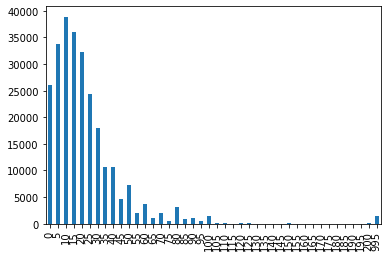

In [124]:
train_values.age.value_counts().sort_index().plot.bar()

In [125]:
train_values['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [126]:
train_values['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [127]:
train_values[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                     'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                     'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',\
                     'has_superstructure_other']].sum()

has_superstructure_adobe_mud               23101
has_superstructure_mud_mortar_stone       198561
has_superstructure_stone_flag               8947
has_superstructure_cement_mortar_stone      4752
has_superstructure_mud_mortar_brick        17761
has_superstructure_cement_mortar_brick     19615
has_superstructure_timber                  66450
has_superstructure_bamboo                  22154
has_superstructure_rc_non_engineered       11099
has_superstructure_rc_engineered            4133
has_superstructure_other                    3905
dtype: int64

In [128]:
train_values['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [129]:
selected_features = ['count_floors_pre_eq','age','area_percentage','height_percentage','land_surface_condition','foundation_type','roof_type','ground_floor_type',\
                     'plan_configuration','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                     'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                     'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',\
                     'has_superstructure_other','count_families','has_secondary_use']
#train_values_subset = train_values[selected_features]
train_values_subset = train_values

In [130]:
#train_values_subset['plan_configuration_d'] = np.where(train_values_subset['plan_configuration'] == 'd', 1,0)

In [131]:
#train_values_subset = train_values_subset.drop(columns='plan_configuration')

In [132]:
#train_values_subset['plan_configuration_d'].value_counts()

In [133]:
train_values_subset = pd.get_dummies(train_values_subset)

In [134]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


##Agregamos columnas


Verificamos que no haya edificios duplicados y nulos

In [135]:
train_values_subset.reset_index()['building_id'].drop_duplicates()

0         802906
1          28830
2          94947
3         590882
4         201944
           ...  
260596    688636
260597    669485
260598    602512
260599    151409
260600    747594
Name: building_id, Length: 260601, dtype: int64

In [136]:
train_values_subset.dropna()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [137]:
train_values_subset['volumen'] = train_values_subset['area_percentage']*train_values_subset['height_percentage']

In [138]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [139]:
#train_values_subset['combinacion_materiales']=train_values_subset.iloc[:,4:15].sum(axis=1)
train_values_subset['combinacion_materiales']=train_values_subset.iloc[:,7:18].sum(axis=1)

In [140]:
train_values_subset.sum()

geo_level_1_id                 3622446
geo_level_2_id               182700764
geo_level_3_id              1630808782
count_floors_pre_eq             555008
age                            6915055
                               ...    
legal_ownership_status_r          1473
legal_ownership_status_v        250939
legal_ownership_status_w          2677
volumen                       11786975
combinacion_materiales          380478
Length: 70, dtype: int64

In [141]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1


In [142]:
train_values_subset['combinacion_usos'] = train_values['has_secondary_use_agriculture']+\
train_values['has_secondary_use_hotel']+train_values['has_secondary_use_rental']+train_values['has_secondary_use_institution']+\
train_values['has_secondary_use_school']+train_values['has_secondary_use_industry']+\
train_values['has_secondary_use_health_post']+train_values['has_secondary_use_gov_office']+\
train_values['has_secondary_use_use_police']+train_values['has_secondary_use_other']

In [143]:
train_values_subset['area/altura'] = train_values_subset['area_percentage']/train_values_subset['height_percentage']

In [144]:
train_values_subset['combinacion_usos'].sum()

29713

In [145]:
train_values_subset['antiguedad_material'] = train_values_subset['age']*train_values_subset['has_superstructure_mud_mortar_stone']

In [146]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55


In [147]:
df = train_values_subset.reset_index().merge(train_labels.reset_index(),how='inner')

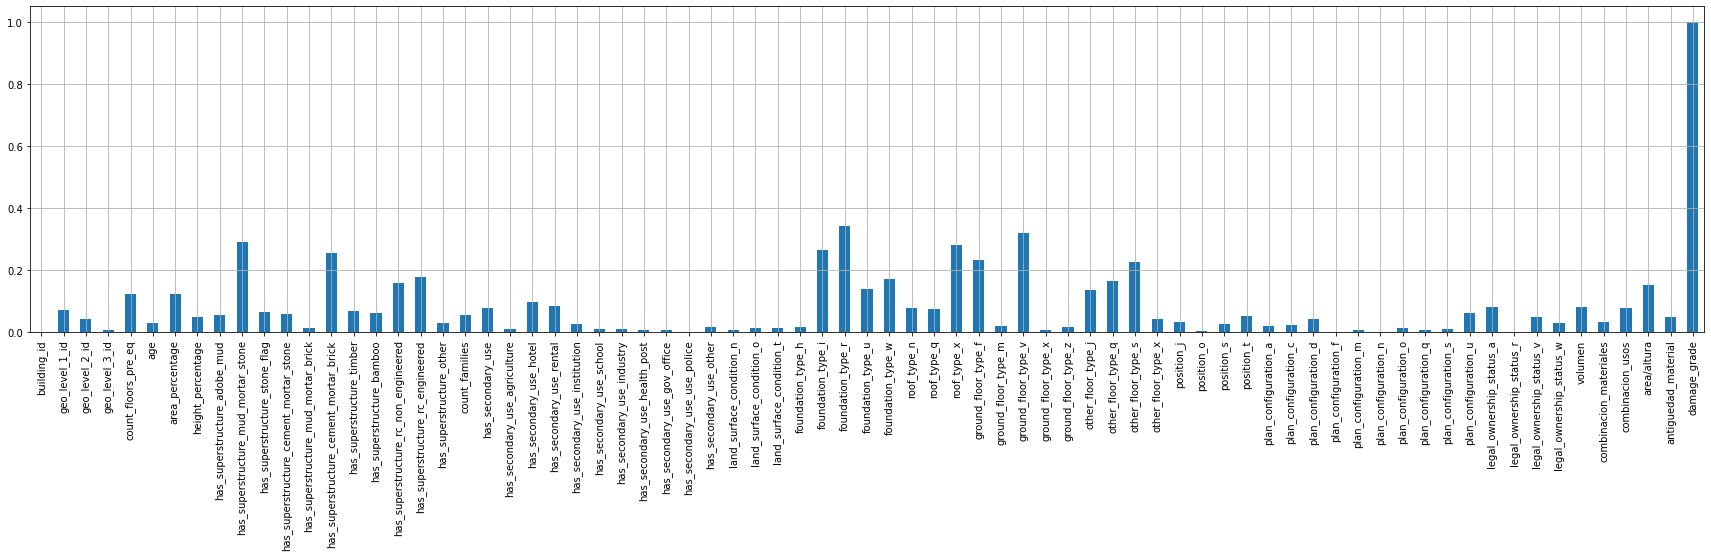

In [148]:
abs(df.corr()['damage_grade']).plot.bar(figsize=(30,6),grid=True)

#Mas Features

In [149]:
p1 = train_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [150]:
p2 = train_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [151]:
p3 = train_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [152]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10,0.889155,0.970732,0.903226
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,84,1,0,2.333333,0,0.460049,0.039624,0.076271


In [153]:
a1 = train_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [154]:
train_values_subset['age_geo_level_id1'].value_counts()

15    129748
20     55331
10     43789
30     28292
25      3441
Name: age_geo_level_id1, dtype: int64

In [155]:
a2 = train_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [156]:
train_values_subset['age_geo_level_id2'].value_counts()

15.0     91064
20.0     68530
10.0     45996
25.0     27556
5.0       6287
60.0      5827
30.0      4357
35.0      3589
45.0      1958
22.5      1694
17.5      1284
12.5       658
40.0       340
27.5       290
32.5       242
995.0      205
50.0       185
80.0       173
47.5       110
55.0        75
0.0         57
95.0        49
37.5        38
42.5        34
7.5          2
100.0        1
Name: age_geo_level_id2, dtype: int64

In [157]:
a3 = train_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [158]:
train_values_subset['age_geo_level_id3'].value_counts()

15.0     65336
20.0     55131
10.0     49929
25.0     27351
5.0      13091
30.0     11125
17.5      6908
12.5      5264
22.5      4030
35.0      3565
40.0      2396
27.5      2186
7.5       1846
50.0      1779
45.0      1471
80.0      1187
60.0      1120
32.5      1040
90.0       908
995.0      606
37.5       576
100.0      536
42.5       428
75.0       395
55.0       393
65.0       334
0.0        311
85.0       292
70.0       250
62.5       194
52.5       188
47.5       140
95.0       137
57.5        62
2.5         34
550.0        8
200.0        7
72.5         6
82.5         6
67.5         6
500.0        4
532.5        4
105.0        3
502.5        2
497.5        2
545.0        2
102.5        2
522.5        2
507.5        2
77.5         2
515.0        2
510.0        2
Name: age_geo_level_id3, dtype: int64

In [159]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,84,1,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0


In [160]:
v1 = train_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [161]:
v2 = train_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [162]:
v3 = train_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [163]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0,45.0,36.0,35.0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0,36.0,36.0,56.0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0,36.0,42.0,58.5
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0,35.0,15.0,40.0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0,49.0,48.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5,33.0,21.0,24.0
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0,40.0,48.0,56.0
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0,40.0,35.0,37.5
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,.

#XGBoost

In [164]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

#the model
import xgboost as xgb

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=45)

In [166]:
param_grid = {"classifier__max_depth": [10, 15, 20],
                "classifier__learning_rate": [00.1, 0.1, 0.3],
                "classifier__n_estimators": [150, 200],
                 "classifier__colsample_bytree" : [0.5, 0.8]}

In [167]:
classifier = xgb.XGBClassifier(n_jobs=-1, scale_pos_weight=1, objective = 'multi:softmax')
sca = StandardScaler()
pipe = Pipeline([("Scaler", sca), ("classifier", classifier)])
grid_search = GridSearchCV(pipe, param_grid, cv =3, n_jobs =-1, verbose = 10, refit=True)

In [ ]:
grid_search.fit(X_train , y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, predicciones_train, average='micro')

0.595694606106343

##Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

posibles_hiperparametros = {'learning_rate':np.arange(0.1,0.5,0.1),
                              'n_estimators':np.arange(16,116,15),
                              'scale_pos_weight':np.arange(2,6,1),
                              'max_depth':np.arange(4,12,1),
                            'min_child_weight':np.arange(1,10,1),
                              'gamma':np.arange(0,0.5,0.1),
                              'subsample':np.arange(0.6,1,0.1),
                            'colsample_bytree':np.arange(0.6,0.91,0.05),
                              'colsample_bylevel':np.arange(0.6,0.91,0.05)}

random_hiperparametros = RandomizedSearchCV(xg_clas, 
                                            posibles_hiperparametros, 
                                            n_iter = 100)
mejores_hp = random_hiperparametros.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mejores_hp.best_params_

In [ ]:
predicciones_mejores_hp_train = mejores_hp.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, predicciones_mejores_hp_train, average='micro')

#Entrega

In [ ]:
id='1GkhS3TIJdxEbdn2bfA9KMaK5t4KbkWzz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values.csv')

In [ ]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values.tail()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0
501372,26,36,6436,2,10,11,4,t,r,q,v,q,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test_values_subset = test_values[selected_features]
test_values_subset=test_values
#test_values_subset['plan_configuration_d'] = np.where(test_values_subset['plan_configuration'] == 'd', 1,0)
#test_values_subset = test_values_subset.drop(columns='plan_configuration')
test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset['volumen'] = test_values_subset['area_percentage']*test_values_subset['height_percentage']
test_values_subset['combinacion_materiales']=test_values_subset.iloc[:,7:18].sum(axis=1)

In [ ]:
test_values.sum()

geo_level_1_id                                                                      1206440
geo_level_2_id                                                                     61166202
geo_level_3_id                                                                    543946443
count_floors_pre_eq                                                                  185302
age                                                                                 2306360
area_percentage                                                                      696152
height_percentage                                                                    472223
land_surface_condition                    ttttttnttntttntttttttttntntnttntttttttttttottt...
foundation_type                           rrrrrrrrrrwrrrrrrrurrrrrrrrrurrwrrrrrrrrrrrrrh...
roof_type                                 nnnxqqnnnnqnnnxnnnnnnnnnxnnqnqnnnnnnnqnnnnnnnn...
ground_floor_type                         fffvffvffffvffvffffffxffvfffvfffffffff

In [ ]:
test_values_subset.sum()

geo_level_1_id                1206440
geo_level_2_id               61166202
geo_level_3_id              543946443
count_floors_pre_eq            185302
age                           2306360
                              ...    
legal_ownership_status_r          517
legal_ownership_status_v        83694
legal_ownership_status_w          862
volumen                       3933630
combinacion_materiales         126610
Length: 70, dtype: int64

In [ ]:
test_values_subset['combinacion_usos'] = test_values['has_secondary_use_agriculture']+\
test_values['has_secondary_use_hotel']+test_values['has_secondary_use_rental']+test_values['has_secondary_use_institution']+\
test_values['has_secondary_use_school']+test_values['has_secondary_use_industry']+\
test_values['has_secondary_use_health_post']+test_values['has_secondary_use_gov_office']+\
test_values['has_secondary_use_use_police']+test_values['has_secondary_use_other']

In [ ]:
test_values_subset['area/altura'] = test_values_subset['area_percentage']/test_values_subset['height_percentage']

In [ ]:
test_values_subset['antiguedad_material'] = test_values_subset['age']*test_values_subset['has_superstructure_mud_mortar_stone']

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,1.166667,20
99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,65,1,1,2.600000,25
890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20,1,0,0.800000,5
745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,57,1,1,6.333333,0
421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120,2,1,3.333333,70
663567,10,1407,11907,3,25,6,7,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,3,0,0.857143,25
1049160,22,1136,7712,1,50,3,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9,2,0,1.000000,50


In [ ]:
#test_values_subset_imp = test_values_subset[['age','area_percentage','count_floors_pre_eq','height_percentage','count_families','volumen','area/altura','antiguedad_material','combinacion_materiales','foundation_type_r','ground_floor_type_v','plan_configuration_d']]

In [ ]:
predictions = gs.predict(test_values_subset)

In [ ]:
id='1m7BvONaXhc0stbfuOklP-JGpVND9AGVf'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('submission_format.csv')

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
submission_format.tail()

,damage_grade
building_id,
310028,1
663567,1
1049160,1
442785,1
501372,1


In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,3


In [ ]:
my_submission.to_csv('submission.csv')